# Death in the United States of America
There are many perspectives possible when dealing with the problem of death. We can look at areas where disproportionate death is occurring, or focus our efforts on the youngest members of the population. The approach here is to examine where the greatest volume of death is occuring. In the same way that climate change efforts are most useful focused on the biggest polluters, by looking to where death is occuring the most we can have strong impact. This analysis is useful to guide policy decisions and program design when it takes the simple goal of reducing death.


## Datasets for analysis

The first dataset is from the National Vital Statistics System (NVSS), a program of the US Centre for Disease Control (CDC). As such the conclusion of this report are most relevent to the USA, though there are likely some transferable learnings. The original data contains many additional columns where are not used here; the below table only describes the columns that are imported for use in this analysis (21 columns,13 520 719 rows).


Note that many elements of this file are an integer because they are coded to a number, the data dictionary for this set is avaliable here https://www.cdc.gov/nchs/nvss/mortality_public_use_data.htm. For example, race at the broadest level (racer3) is coded as: 

| Meaning | Code |
| ---| --- |
| White | 1 |
| Races other than White or Black | 2 |
| Black | 3 | 

### **Multiple Cause of Death Data File**
<https://www.cdc.gov/nchs/data_access/vitalstatsonline.htm#Mortality_Multiple>

| Attribute | Description | Type |
| --- | ---------- | --- |
| restatus | The residential status of the individual at death | int
| educ2003 | Education level of the individual at death (coded from 1-9) | float
| monthdth | The month of death| int
| sex | The sex of the individual| str
| age | The age of the individual at death (coded with extra information as a 1 or two digit prefix)| int
| ager12 | 12 catagory simplified grouping of age | int
| placedth | The type of location where death occured (eg. hospital, decedent's home, etc.) | int
| marstat | The marital status of the individual (S - single,M - married,W - widowed,D - divorced or U - unknown) | str
| weekday | The day of the week when the death occured | int
| injwork | Whether the injury occured at work | str
| mandeath | The manner in which death occured | float
| activity | The activity in which the individual was engaged in at death | float
| injury | The type of location in which the injury leading to death occured | float
| ucod | ICD-10 number of concurrent causes of death| str
| record_1 | The primary cause of death (ICD-10 code)| str
| record_2 | The secondary cause of death (ICD-10 code) | str
| record_3 | The tertiary cause of death (ICD-10 code) | str
| race | The detailed race code of the individual | int
| racer5 | The broad race code of the individual | int
| racer3 | The very broad race code of the individual | int

Also used in this analysis is a dataset which provides the description for the ICD-10 coding which is used in the main dataset. This data is merged into the main data during the analysis. This file was create by created by Kamille Delgardo for the Center for Marfan Syndrome and Related Aortic Disorders at the Stanford University School of Medicine as is avaliable here: https://github.com/kamillamagna/ICD-10-CSV. It was cross-references with the offical coding to ensure accuracy (https://www.who.int/classifications/icd/icdonlineversions/en/)

### **ICD-10 coding and description file**

| Attribute | Description | Type |
| --- | ---------- | --- |
| ucod | ICD-10 code | str
| icd_desc | ICD-10 catagorical description | str

For the exact version of the data files see here https://www.kaggle.com/kristenosborne/mortality and here https://www.kaggle.com/kristenosborne/icd10cat

## Dataset creation and manipulation
The following code sets up the python libary for use, reads in the main datasets and displays the for 5 rows, then creates a new simplified age variable. Finally the additional dataset is imported and joined with the main datset.

In [1]:
#Import libraries
import pandas as pd #for data analysis and manipulation
import numpy as np #support arrays and matrices and operations on these
import matplotlib.pyplot as plt #for plotting
import seaborn as sns #add on for plotting, gives better functionality for some plots
import squarify  #use to display a treemap, allows plotting with squares
import datetime as datetime #handle dates and times in the data better

#display plots below code cells
%matplotlib inline 

In [2]:
#Create one mortality set with all years - done in one step to prevent the creation of large seperate dataframes for each year

dtypes = {'ucod': 'str','age':'int'} #Using this ensures certain attributes get read in as the correct types, which is important for downstream parsing.

#read in data from the years 2013-17, which are stored as seperate csv files. This is done by reading in the 2013 file, then appending all other years to this.
mort_all = (pd.read_csv("../input/mortality/mort2013.csv",dtype=dtypes,parse_dates={'monthyear': ['monthdth','year']},usecols = ['restatus','educ2003','monthdth',
                                                                     'sex','age','ager12','placdth','marstat',
                                                                     'weekday','year','injwork',
                                                                     'mandeath','activity','injury',
                                                                     'ucod','ranum','record_1',
                                                                     'record_2','record_3','race',
                                                                     'racer5','racer3'])).append([
                           (pd.read_csv("../input/mortality/mort2014.csv",dtype=dtypes,parse_dates={'monthyear': ['monthdth','year']}, usecols = ['restatus','educ2003','monthdth',
                                                                     'sex','age','ager12','placdth','marstat',
                                                                     'weekday','year','injwork',
                                                                     'mandeath','activity','injury',
                                                                     'ucod','ranum','record_1',
                                                                     'record_2','record_3','race',
                                                                     'racer5','racer3']))
                           ,(pd.read_csv("../input/mortality/mort2015.csv",dtype=dtypes,parse_dates={'monthyear': ['monthdth','year']}, usecols = ['restatus','educ2003','monthdth',
                                                                     'sex','age','ager12','placdth','marstat',
                                                                     'weekday','year','injwork',
                                                                     'mandeath','activity','injury',
                                                                     'ucod','ranum','record_1',
                                                                     'record_2','record_3','race',
                                                                     'racer5','racer3']))
                           ,(pd.read_csv("../input/mortality/mort2016.csv",dtype=dtypes,parse_dates={'monthyear': ['monthdth','year']},usecols = ['restatus','educ2003','monthdth',
                                                                     'sex','age','ager12','placdth','marstat',
                                                                     'weekday','year','injwork',
                                                                     'mandeath','activity','injury',
                                                                     'ucod','ranum','record_1',
                                                                     'record_2','record_3','race',
                                                                     'racer5','racer3']))
                           ,(pd.read_csv("../input/mortality/mort2017.csv",dtype=dtypes,parse_dates={'monthyear': ['monthdth','year']}, usecols = ['restatus','educ2003','monthdth',
                                                                     'sex','age','ager12','placdth','marstat',
                                                                     'weekday','year','injwork',
                                                                     'mandeath','activity','injury',
                                                                     'ucod','ranum','record_1',
                                                                     'record_2','record_3','race',
                                                                     'racer5','racer3']))])
#show the head of the dataset to check it has read in correctly
mort_all.head(5)
mort_all.shape


(13520719, 21)

In [3]:
#Convert all error codes (9999, 5999 etc) to NaN and remove the '10, 20, 30, 40, 50, or 60' prefix from age for simplified analysis. 

#turn the age variable into an int to strip the first number then strip leading 0s
mort_all['age_simp'] = mort_all['age'].astype(str)

#first use replace to turn the error values into nan
mort_all['age_simp'] = (mort_all['age_simp'].replace(['9999','6999','5999','4999','3999','2999','1999'], np.nan))
#then remove the first character
mort_all['age_simp'] = mort_all['age_simp'].str[1:]
#then remove any leading zeros. You can't just strip the first two characters of the string as some people are 100 years or over
mort_all['age_simp'] = mort_all['age_simp'].str.lstrip('0')
#finally convert back to an float
mort_all['age_simp'] = mort_all['age_simp'].astype(float)

#Import a dataset with the ICD-10 code classification at the categorical level
dtypes = {'ucod': 'str'} #ensure the code type is the same as the code type in the main data
ICD_codes = pd.read_csv("../input/icd10cat/categories.csv", header=None,dtype=dtypes, names = ['ucod','icd_desc'])

#Join the two DataFrames
mort_all = mort_all.join(ICD_codes.set_index('ucod'), on = 'ucod')

#Add a reliable count variable
mort_all['dcount_num'] = pd.Series(np.ones(len(mort_all))) 

#show the head of the dataset again to check the changes
mort_all.head(5)


,monthyear,restatus,educ2003,sex,age,ager12,placdth,marstat,weekday,injwork,...,ranum,record_1,record_2,record_3,race,racer3,racer5,age_simp,icd_desc,dcount_num
0,2013-01-01,1,NaN,M,1090,11,6,M,4,U,...,3,F03,I10,K579,1,1,1,90.0,Unspecified dementia,1.0
1,2013-01-01,1,NaN,F,1080,10,6,W,3,U,...,1,F03,NaN,NaN,1,1,1,80.0,Unspecified dementia,1.0
2,2013-01-01,2,NaN,M,1073,9,6,D,4,U,...,1,F03,NaN,NaN,1,1,1,73.0,Unspecified dementia,1.0
3,2013-01-01,1,NaN,M,1078,10,1,M,1,U,...,2,C798,J449,NaN,3,2,3,78.0,Secondary malignant neoplasm of other specifie...,1.0
4,2013-01-01,1,NaN,F,1083,10,6,D,4,U,...,4,C349,F179,I48,1,1,1,83.0,Malignant neoplasm of unspecified part of bron...,1.0


In [4]:
#Setting up plot settings
#Define default style
plt.style.use('ggplot')

## Inital perspectives
The first step is to get an overview of the deaths over time within the dataset, by plotting the number of deaths against the month and year for the period 2013-17. This lets us determine if the number of deaths are increasing, and if there are times of year where more deaths occur.

Text(0, 0.5, 'Number of deaths')

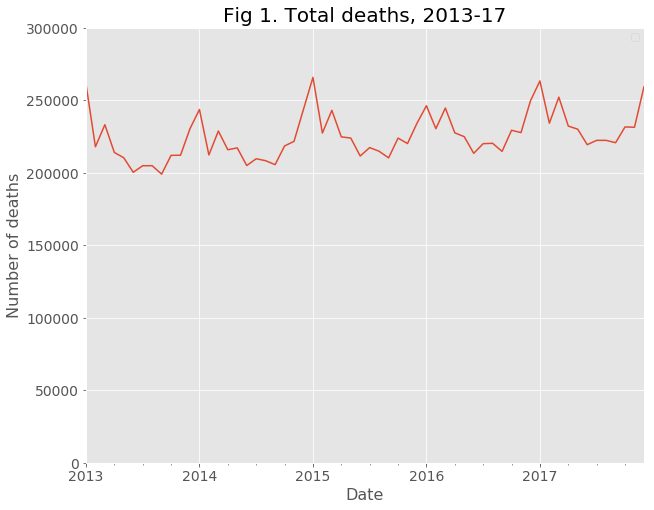

In [5]:
#Plot line chart of the total deaths per year

#create pre-plot data by grouping by the month and year date and summing the count variable
#in order to have a data frame returned, then add .reset_index
pre_line_total_dth = (mort_all.groupby('monthyear').sum()['dcount_num']).reset_index()

#create a line charts of the 
line_total_dth = pre_line_total_dth.plot.line(y='dcount_num',x='monthyear',fontsize = 14,figsize=(10,8))

#Set a more appropriate axis range for better perspective
line_total_dth.set_ylim(0,300000)

#set the tile and size
line_total_dth.set_title('Fig 1. Total deaths, 2013-17', fontsize=20)

#remove the legend
line_total_dth.legend("")

#add an appropriate label for both axes
line_total_dth.set_xlabel('Date', fontsize=16)
line_total_dth.set_ylabel('Number of deaths',fontsize=16)

As figure 1 shows, the number of deaths in the USA is generally between 200 000 and 250 000 each month. Interestingly, the number of deaths rises at the beginning and end of each year. Figure 1 also shows a general rise in the number of deaths each year, in line with an increasing US population.

The peaks and troughs in figure 1 show that that some months have more deaths then others. To get perpective on this, the next plot visualises the number of deaths in each month for all years in the data. This lets us determine how the deaths by months differ and visualize the size of this effect.

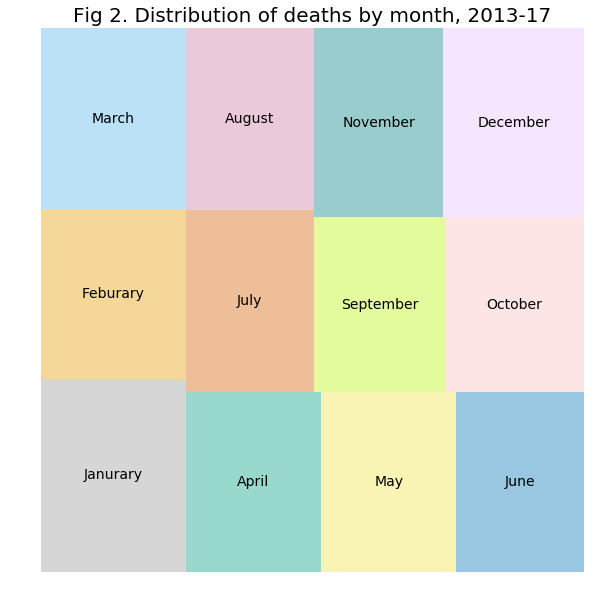

In [6]:
#plot treemap of deaths by month to compare the differences in number of deaths for each month
#create plot data by just extracting the date and count variable from the main data
pre_plot = pd.DataFrame(mort_all[['monthyear','dcount_num']])

#extract just the month from the data variable
pre_plot['month'] = pd.DatetimeIndex(mort_all['monthyear']).month

#group by the month and sum the count variable. Reset indexes after.
pre_plot = (pre_plot.groupby('month').sum()['dcount_num']).reset_index()

#create some custom labels and colors for the plot
labels = ['Janurary','Feburary','March','April','May','June','July','August','September','October','November','December']
colors = ["#999999", "#E69F00", "#56B4E9", "#009E82", "#F0E442", "#0072B2", "#D55E00", "#CC79A7", '#bcf60c', '#fabebe', '#008080','#e6beff']

#set the plot sizing and the font sizing
fig = plt.figure(figsize=(14, 10))
plt.rc('font', size=14)          

#create the actual plot using the squarify library
tree_months = fig.add_subplot(111, aspect="equal")
tree_months = squarify.plot(sizes=pre_plot['dcount_num'],label =labels, alpha=.4,color=colors)

#set title and size of title
plt.title("Fig 2. Distribution of deaths by month, 2013-17",fontsize=20)

#don't show the axis
plt.axis('off')

#show the plot
plt.show()



Each square in figure 2 represents a month, with the size of the square corresponding to the number of deaths. From this we can see that Janurary has more deaths than any other month, and that months such as September or June have fewer deaths. The differences are not extreme, but this does support the trends in figure 1. One possible reason for this is seasonally-linked causes of death. Given the cold weather in the USA during the December-March period (longer in some areas), those who are at risk of conditions exacerbated by the cold may die more during this time. It is also associated with flu season, a condtion which can be very dangerous for those already immunocompromised. It may even be that healthcare sevices are less available during the holiday period as medical staff take leave.


## Types of death

These first plots suggest that efforts should be focused on preventing death at the end or beginning of the year, but there are many other factors to consider. The next plots examine the causes of death. First, the broad manner of death is seen in figure 3. This helps us narrow our focus when we move on to the specific cause of death by showing which broad category has the most deaths.

Text(0, 0.5, 'Number of deaths')

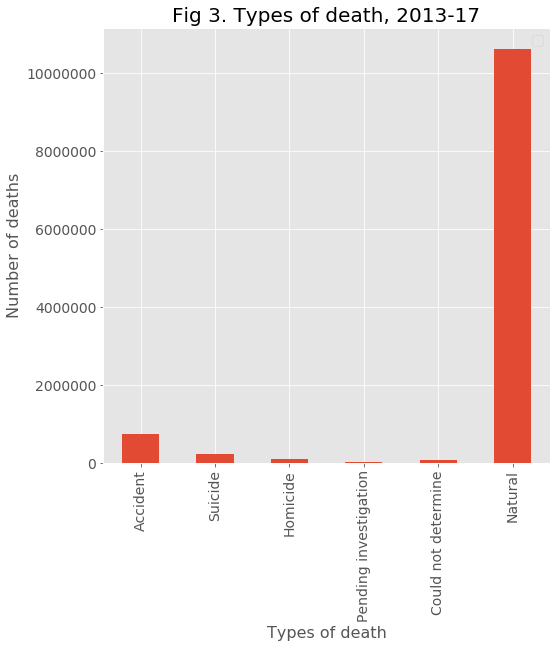

In [7]:
#Plot bar chart of the manner of death across all years

#create pre-plot data by grouping by the manner of death and summing the count variable
#in order to have a data frame returned, then add .reset_index
pre_bar_manners = (mort_all.groupby('mandeath').sum()['dcount_num']).reset_index()

#add some better labels using https://www.cdc.gov/nchs/nvss/mortality_public_use_data.htm
labels = ['Accident','Suicide','Homicide','Pending investigation','Could not determine','Natural']

#create a horizontal bar plot using the sorts values of the top ten
bar_manners = pre_bar_manners.plot.bar(y='dcount_num',x='mandeath',fontsize = 14, figsize=(8,8))

#set the tile and size
bar_manners.set_title('Fig 3. Types of death, 2013-17', fontsize=20)

#prevent scienfic notation being used
bar_manners.ticklabel_format(style="plain",axis="y", useOffset=False)

#use the better labels
bar_manners.set_xticklabels(labels)

#remove the legend
bar_manners.legend("")

#add an appropriate label for both axes
bar_manners.set_xlabel('Types of death',fontsize=16)
bar_manners.set_ylabel('Number of deaths', fontsize=16)

The striking finding in figure 3 is that the vast majority of deaths over the given period in the USA were natural. This type then should be a focus for investigations of ways to lower mortality if concerned about volume alone. There were over 10 000 000 deaths of natural causes in the USA over the 2013-17 period. The next chart will drill down further to more specific causes of death, showing which are the top ten causes of death in the USA over the given period.

Text(0, 0.5, 'Primary cause of death (ICD-10)')

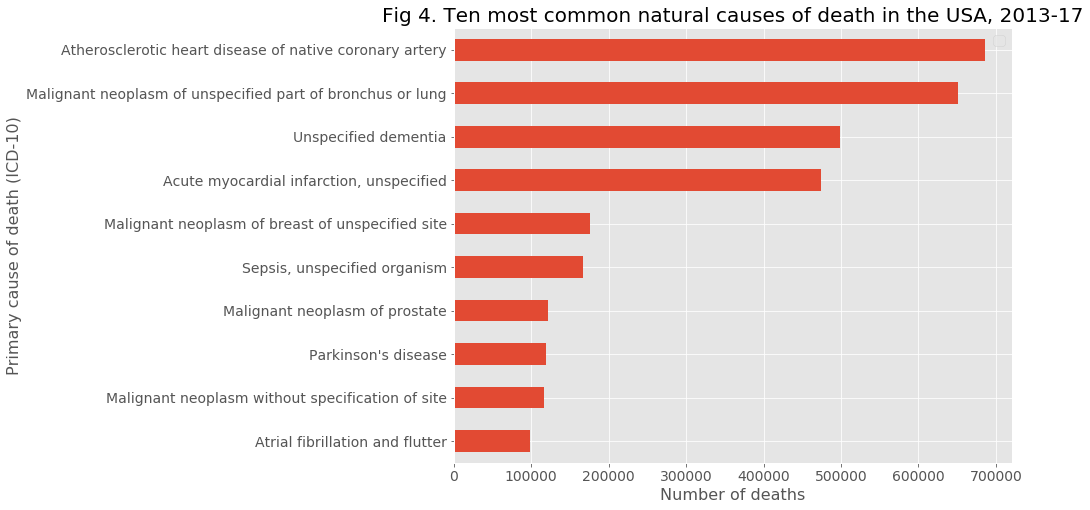

In [8]:
#Plot horiztonal bar chart of the top ten causes of death across all years 

#create pre-plot data by grouping by the shortened ICD code and summing the count variable
#in order to have a data frame returned, then add .reset_index
#filter only the natural causes of death given the findings of figure 3
#finally, use nlargest() to return the top 10 by the number of instances (summed dcount_num)

pre_hbar_icd = (mort_all[(mort_all['mandeath'] == 7.0)].groupby('icd_desc').sum()['dcount_num']).reset_index().nlargest(10,'dcount_num')

#create a horizontal bar plot using the sorts values of the top ten
hbar_icd = pre_hbar_icd.sort_values('dcount_num').plot.barh(y='dcount_num',x='icd_desc',fontsize = 14, figsize=(10,8))

#set the tile and size
hbar_icd.set_title('Fig 4. Ten most common natural causes of death in the USA, 2013-17', fontsize=20)

#remove the legend
hbar_icd.legend("")

#add an appropriate label for both axes
hbar_icd.set_xlabel('Number of deaths',fontsize = 16)
hbar_icd.set_ylabel('Primary cause of death (ICD-10)', fontsize = 16)


The ten most common nautral casues of death are seen in figure 4. For reference, 'malignent neoplasm' is a cancerous tumor. The most common causes of death are: atheroscelortic heart disease of native coranary artery and cancer of an unspeficifed part of broncus or lung. Put simply, a type of heart diesease and a type of lung cancer. In fact, nearly all of the causes of death in figure 4 are either cancerous or related of heart issues. This indicates two avenues for death prevention - preventing cancer and heart disease.



So far we have not considered that people have more than one concurrent cause of death. If most deaths have many simultaneous causes,the analysis we have done on the most common causes of death become less useful. If this is the case, perhaps our focus should be on those who have many comorbid illnesses. The next plot is a histogram of the number of concurrent causes of death. This lets us determine how common a large number of concurrent causes of death is.

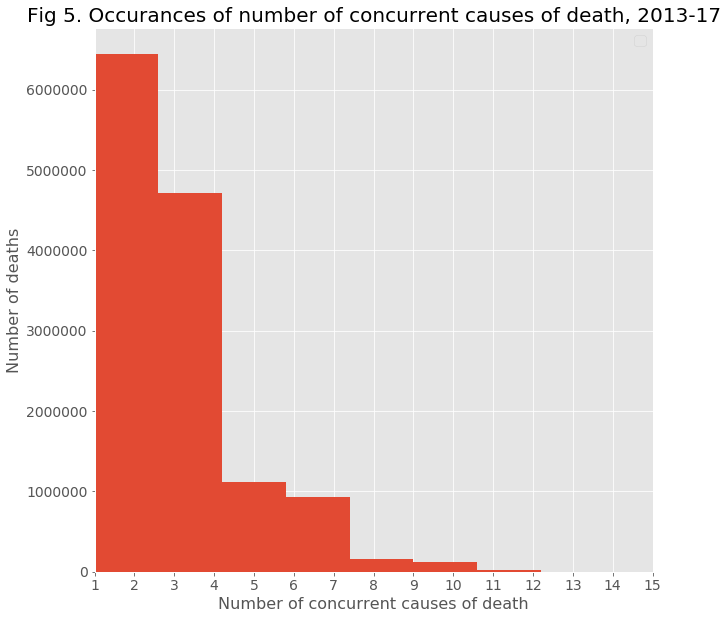

In [9]:
#Plot histogram of deaths by number of concurrent causes of death for all years 

#set the plot sizing and the font sizing
plt.rc('font', size=14)      

#create the histogram, setting the figure size
hist_weekday = mort_all['ranum'].hist(figsize=(10,10))

#set the tile and size
hist_weekday.set_title('Fig 5. Occurances of number of concurrent causes of death, 2013-17', fontsize=20)

#remove the legend
hist_weekday.legend("")

#add an appropriate label for both axes
hist_weekday.set_ylabel('Number of deaths',fontsize = 16)
hist_weekday.set_xlabel('Number of concurrent causes of death', fontsize = 16)

#start the histogram at 1 since there is always at least one cause of death
hist_weekday.set_xlim(1,15)

#set the ticks on the x axis to 1 to make it more readable
hist_weekday.set_xticks([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15])

Figure 5 shows that the data is heavily skewed towards fewer concurrent causes of death; most deaths have less that 4 concurrent causes. This supports the idea of focusing on the most common causes of death when trying to reduce mortality, as there is less chance that another cause will result in death instead. 

## Age and mortality
The first 5 figures have explored death rates throughout the years, at different times of the year and difference causes of death. There are characteristics of the individual that may make them more likely to die however, such as gender, age or socio-economic status. Here we will focus on age. By understanding how age interacts with mortality we can focus our efforts on those in the most 'at-risk' age groups.

The first plot is the average (mean) age of death throughout the 2013-17 period. 

Text(0, 0.5, 'Mean age at death')

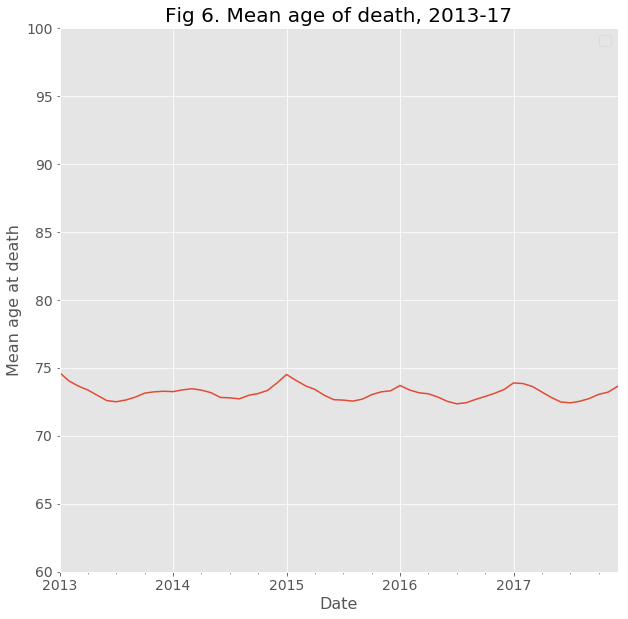

In [10]:
#Plot line chart of the mean age at death per year 

#create pre-plot data by grouping by the month and year date and finding the average age
#in order to have a data frame returned, then add .reset_index
pre_line_mean_age = (mort_all.groupby('monthyear').mean()['age_simp']).reset_index()

#create a line plot using the mean age and the date
line_mean_age = pre_line_mean_age.plot.line(y='age_simp',x='monthyear',fontsize = 14,figsize=(10,10))

#Set a more appropriate axis range for better perspective
line_mean_age.set_ylim(60,100)

#set the tile and size
line_mean_age.set_title('Fig 6. Mean age of death, 2013-17', fontsize=20)

#remove the legend
line_mean_age.legend("")

#add an appropriate label for both axes
line_mean_age.set_xlabel('Date',fontsize=16)
line_mean_age.set_ylabel('Mean age at death',fontsize=16)

The mean age of death seen in figure 6 has been fairly steady at between 73-75 over the whole 2013-17 period. Interestingly the mean age of death rises during the times we have previously seen the total number of death rise - the December-January period. It coud be that a rise in deaths for those over 75 is partially responsible for the overall rise in deaths during the winter period in the USA.

To check that a few high or low age values are not strongly affecting the mean, the next plot shows the median age at death over the same period.

Text(0, 0.5, 'Median age at death')

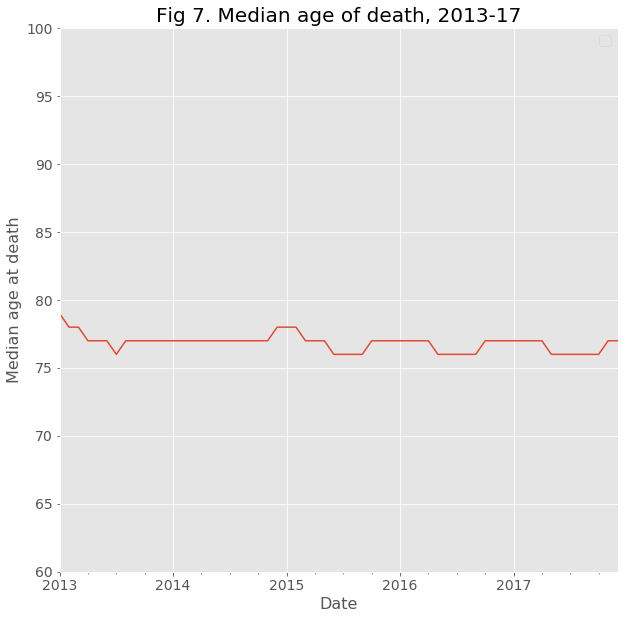

In [11]:
#Plot line chart of the median age at death per year 

#create pre-plot data by grouping by the month and year date and finding the median age
#in order to have a data frame returned, then add .reset_index
pre_line_median_age = (mort_all.groupby('monthyear').median()['age_simp']).reset_index()

#create a line plot using the median age and the date
line_median_age = pre_line_median_age.plot.line(y='age_simp',x='monthyear',fontsize = 14,figsize=(10,10))

#Set a more appropriate axis range for better perspective
line_median_age.set_ylim(60,100)

#set the tile and size
line_median_age.set_title('Fig 7. Median age of death, 2013-17', fontsize=20)

#remove the legend
line_median_age.legend("")

#add an appropriate label for both axes
line_median_age.set_xlabel('Date',fontsize=16)
line_median_age.set_ylabel('Median age at death',fontsize=16)

As figure 7 shows, the median age of death is higher than the mean age seen in figure 6. This suggests that a limited amount of infant mortality may be affecting the mean age. It further bolsters the perspective that in terms of number of deaths, the focus is on older individuals.

To try and better understand the relationship between age and date in mortality, the next plot is a random sample of 1000 points in the dataset, and plots age against date. This give a different perspective on the relationship between age and date of death and helps us look for patterns.

##### Plot scatter plot of age by month of death 

#create pre-plot data by randomly sampling the main data, or we will have far too many data points to plot
pre_sctr_age  = mort_all[['monthyear','age_simp']].sample(n=1000, random_state=1)

#set the plot sizing and the font sizing
fig = plt.figure(figsize=(8, 8))
plt.rc('font', size=14)          

#create a scatter plot using the sorts values of the top ten
sctr_age = sns.scatterplot(pre_sctr_age['monthyear'], pre_sctr_age['age_simp'])

#Set a more appropriate axis range for better perspective
sctr_age.set_xlim(datetime.datetime(2013, 1, 1), datetime.datetime(2018, 1, 1))

#set the tile and size
sctr_age.set_title('Fig 8. Random sample (1000 values) of deaths by age and date of death, 2013-17', fontsize=20)

#remove the legend
sctr_age.legend("")

#add an appropriate label for both axes
sctr_age.set_xlabel('Date of death', fontsize=16)
sctr_age.set_ylabel('Age at death',fontsize=16)

Because figure 8 is a random sample of the death in the dataset, we can be fairly confident it shows the same trend the whole dataset would. By only taking a random sample though it makes it much easier to visualise in scatter plot form. The same trend that previous plots have shown, that there are more deaths among older individuals, is present. It doesn't demonstrate any significant cluster of any age group by date however.

This explores the relationship between age and date at death, but we can now return to the most common causes of death which we explored in figure 3. The next plot is a heatmap which shows the relationship between the age at death and the cause of death. This way we can see if the age groups which contain the most deaths are closely related to the most common causes of death.

Text(46.99999999999997, 0.5, 'Cause of death')

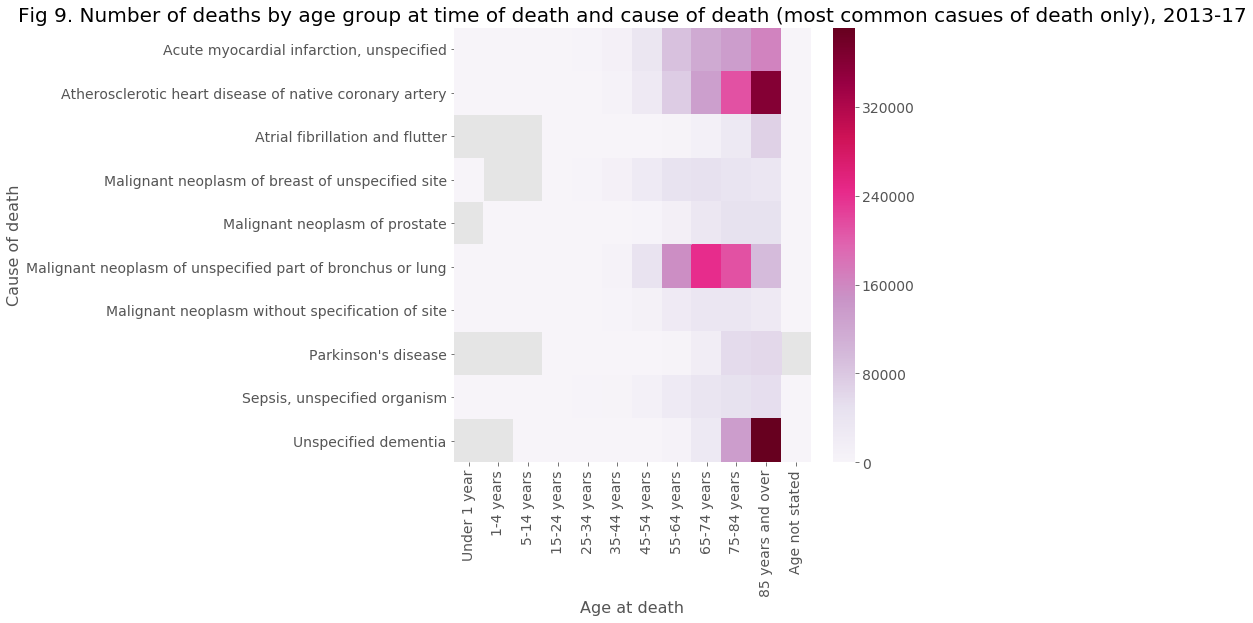

In [13]:
#Plot heatmap of the age at death and the cause of death across all years

#use the grouping of the most common causes of death to create a list
highest_cause = pre_hbar_icd['icd_desc'].tolist()

#create pre-plot data by grouping by the age catagory and the cause of death and summing the count variable
#in order to have a data frame returned, then add .reset_index
#use the list of most common causes to subset the data so we can see the interstion of the most common causes and age
pre_heatmap_age_icd = (mort_all[(mort_all['icd_desc'].isin(highest_cause))].groupby(['ager12','icd_desc']).sum()['dcount_num']).reset_index()

#reshape it to get in the correct format for a heatmap 
# pandas pivot
pre_heatmap_age_icd = pd.pivot_table(pre_heatmap_age_icd, values='dcount_num', 
                     index=['icd_desc'], 
                     columns='ager12')

#set the plot sizing and the font sizing
fig = plt.figure(figsize=(8, 8))
plt.rc('font', size=14)          

#add some better labels using https://www.cdc.gov/nchs/nvss/mortality_public_use_data.htm
labels = ['Under 1 year','1-4 years','5-14 years','15-24 years','25-34 years','35-44 years','45-54 years','55-64 years','65-74 years','75-84 years','85 years and over','Age not stated']

#make plot
heatmap_age_icd = sns.heatmap(pre_heatmap_age_icd,cmap="PuRd", xticklabels = labels)

#set the tile and size
heatmap_age_icd.set_title('Fig 9. Number of deaths by age group at time of death and cause of death (most common casues of death only), 2013-17', fontsize=20)

#add an appropriate label for both axes
heatmap_age_icd.set_xlabel('Age at death', fontsize=16)
heatmap_age_icd.set_ylabel('Cause of death',fontsize=16)

A few relationships stand out in figure 9 - the  number of deaths among those who are 85 years and over from either atherosclerotic heart disease of the native coronary artery or unspecificed dementia, and the relatively broad spread of ages affected by malignant neoplasm of an unspecified part of the bronchus of lung. It certainly appears that the most common causes of death are more common the older the individual is. If efforts need to be focused further from the most common causes of death, this may help to guide those decisions.



### Race and mortality
There is a demographic characteristic we have not reviewed yet -  race. Race in this dataset is divided into 14 specific fields, 5 broad fields or 3 general fields. The next plot shows the proportion of all death in the 2013-17 period for each general racial group. This allows an insight into which racial group has the most deaths occurring.

Text(0, 0.5, '')

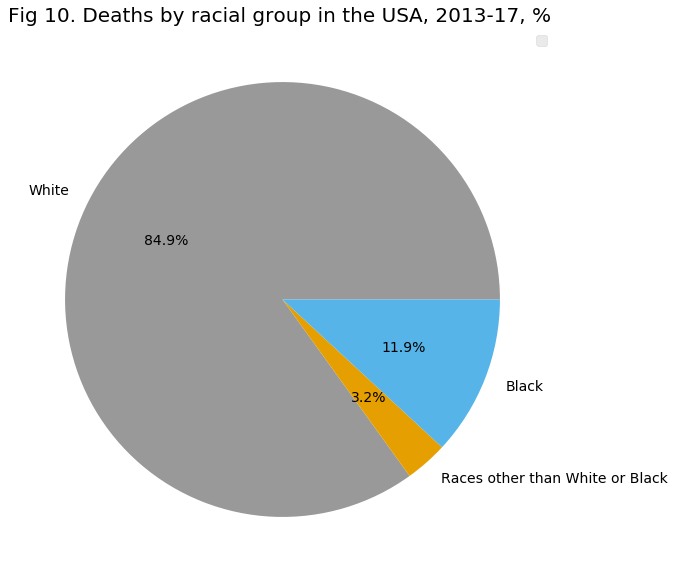

In [14]:
#Plot pie plot of broad racial group

#create pre-plot data by grouping by the broad age group and summing the count variable
#in order to have a data frame returned, then add .reset_index
pre_pie_race = (mort_all.groupby('racer3').sum()['dcount_num']).reset_index()

#add some better labels using https://www.cdc.gov/nchs/nvss/mortality_public_use_data.htm
labels = ['White','Races other than White or Black','Black']

#create a long color list
colors = ["#999999", "#E69F00", "#56B4E9", "#009E82", "#F0E442", "#0072B2", "#D55E00", "#CC79A7", '#bcf60c', '#fabebe', '#008080','#e6beff']

#create a pie plot using the age categories and the number of deaths in each one
pie_race = pre_pie_race.plot.pie(y = 'dcount_num'
                               ,x = 'racer3'
                               ,autopct='%.1f%%' #present the values to one decimal place in the plot
                               ,figsize=(10,10) 
                               ,colors = colors #use the custom colors
                                 ,labels=labels
                               ,fontsize = 14)

#set the tile and size
pie_race.set_title('Fig 10. Deaths by racial group in the USA, 2013-17, % ', fontsize=20)

#remove the legend
pie_race.legend('')

#remove the x label
pie_race.set_ylabel('')

The vast majority of deaths within the dataset were of white individuals (almost 85%), as seen in figure 10. It is important to not this does not take into account the racial makeup of the USA, and indeed some racial minority populations have disproportionately higher death rates. Rather this is a reflection of the fact that white is the majority racial group in the USA. Deeper analysis of the racial dimension of death should take into account the population size.

Combining the dimensions we have already examined, the next plot shows the racial group of decedents over time. This will show if there are certain periods of time in which the numbers of deaths in a racial group is higher.

Text(0.5, 0, 'Date of death')

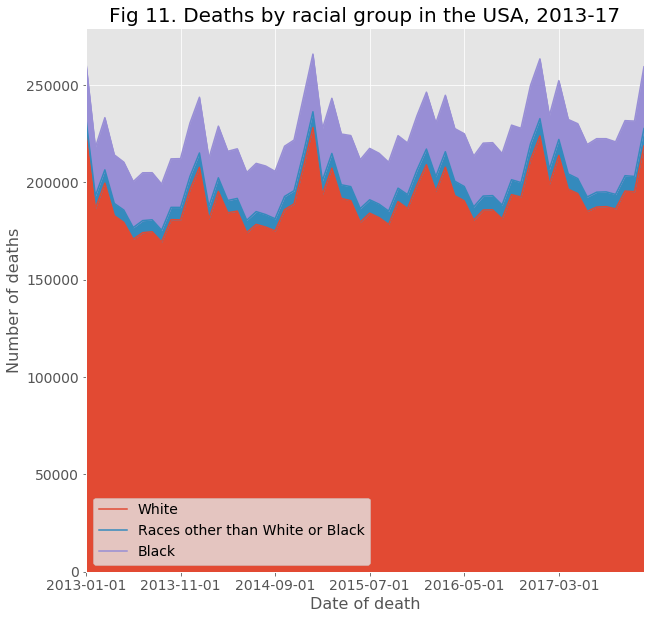

In [15]:
#Plot area plot of racial group by month and year of death 

pre_area_race_date = (mort_all.groupby(['racer3','monthyear']).sum()['dcount_num']).reset_index()

#create a str version of the date to use as the index in the pivot
pre_area_race_date['date'] = pre_area_race_date.monthyear.apply(lambda x: str(x).split(" ")[0])

#reshape it to get in the correct format for a area plot using pandas pivot
pre_area_race_date = pd.pivot_table(pre_area_race_date, values='dcount_num', 
                     index='date', 
                     columns='racer3')
#create the plot
area_race_date = pre_area_race_date.plot.area(figsize=(10,10),fontsize=14)

#add some better labels using https://www.cdc.gov/nchs/nvss/mortality_public_use_data.htm
labels = ['White','Races other than White or Black','Black']

#set the legend to use these labels and set the and legend size
area_race_date.legend(labels,prop={'size': 14})

#set the tile and size
area_race_date.set_title('Fig 11. Deaths by racial group in the USA, 2013-17', fontsize=20)

#set the correct axis labels
area_race_date.set_ylabel('Number of deaths',fontsize=16)
area_race_date.set_xlabel('Date of death',fontsize=16)

Reflected in figure 11 is the same trend in figure 1 regarding the spike in deaths during certain times of the year. It doesn't seem as if certain racial groups experience greater numbers of death during different times however, as the shape of each racial groups area is fairly consistent. 

We can also look at race in relationship to age. We know that older age groups have greater numbers of deaths, but how might this differ by race? The next figure is a box plot of age by racial group, showing the mean age at death and how widely distributed this factor is for each racial group. If certain racial groups have a different relationship between age and death is affects how you address mortality in these groups.

Text(0.5, 0, 'Racial group')

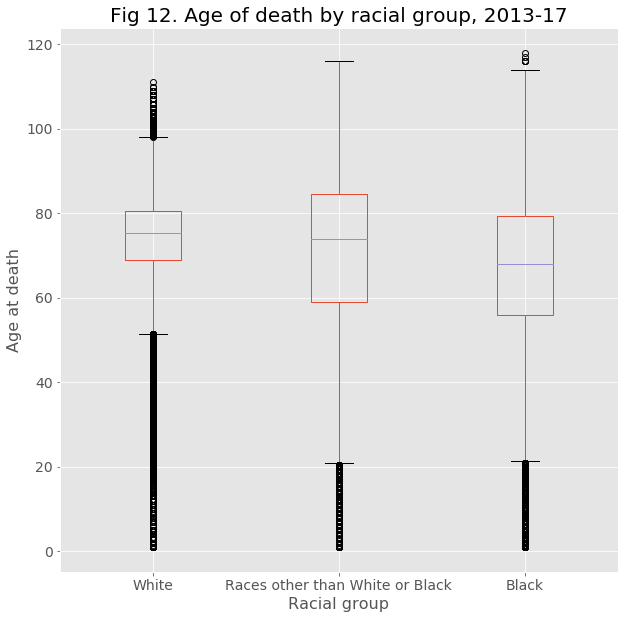

In [16]:
#Plot box plot of racial group by age at of death 

#reshape it to get in the correct format for a area plot using by useing pandas pivot

pre_box_age_race = pd.pivot_table(mort_all, values='age_simp', 
                     index=mort_all.index, 
                     columns='racer3')

#create the plot
box_age_race = pre_box_age_race.boxplot(figsize=(10,10),fontsize=14)

#add some better labels using https://www.cdc.gov/nchs/nvss/mortality_public_use_data.htm
labels = ['White','Races other than White or Black','Black']

#use the better labels
box_age_race.set_xticklabels(labels)

#set the tile and size
box_age_race.set_title('Fig 12. Age of death by racial group, 2013-17', fontsize=20)

#set the correct axis labels
box_age_race.set_ylabel('Age at death',fontsize=16)
box_age_race.set_xlabel('Racial group',fontsize=16)

Figure 12 shows that the mean age of death is slightly less for non-white racial groups, and that these group have a more widely distributed range of ages at death. Because the size of this dataset is so great, it is to be expected that there are many outliers in the plot.

## Conclusions
From this analysis of the volumes of death occuring in the USA, are a number of potential avenues for intervention. The wintertime has higher numbers of death, indication a period during which additional public health campaigns may be useful. There is also a concentration of death among older individuals, and certain causes of death are responsible for vast numbers of mortality. These are further avenues of intervention if the focus is on reducing the overall numbers of deaths.